In [56]:
#importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
#loading the dataframe
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [58]:
#attributes in the dataframe
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [59]:
#removing unnecessary attributes before analysis
df = df[["status","card_present_flag","account","txn_description","first_name","balance","date",
                   "gender","age","merchant_suburb","merchant_state","extraction",
                   "amount","customer_id","movement"]]
df.head()

,status,card_present_flag,account,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,movement
0,authorized,1.0,ACC-1598451071,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,CUS-2487424745,debit
1,authorized,0.0,ACC-1598451071,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,CUS-2487424745,debit
2,authorized,1.0,ACC-1222300524,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,CUS-2142601169,debit
3,authorized,1.0,ACC-1037050564,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,CUS-1614226872,debit
4,authorized,1.0,ACC-1598451071,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,CUS-2487424745,debit


In [60]:
#summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   account            12043 non-null  object        
 3   txn_description    12043 non-null  object        
 4   first_name         12043 non-null  object        
 5   balance            12043 non-null  float64       
 6   date               12043 non-null  datetime64[ns]
 7   gender             12043 non-null  object        
 8   age                12043 non-null  int64         
 9   merchant_suburb    7717 non-null   object        
 10  merchant_state     7717 non-null   object        
 11  extraction         12043 non-null  object        
 12  amount             12043 non-null  float64       
 13  customer_id        12043 non-null  object        
 14  moveme

In [61]:
#convert extraction to datetime format
df["extraction"] = pd.to_datetime(df["extraction"])

In [62]:
#average transaction amount per customer
df['amount'].mean()

187.93358797641767

In [63]:
#number of transactions per customer
df["customer_id"].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

In [64]:
#number of transactions per date
df["date"].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [65]:
#correlation between attributes
df.corr()

,card_present_flag,balance,age,amount
card_present_flag,1.000000,0.005925,-0.008405,-0.002074
balance,0.005925,1.000000,0.199329,0.059178
age,-0.008405,0.199329,1.000000,0.029980
amount,-0.002074,0.059178,0.029980,1.000000


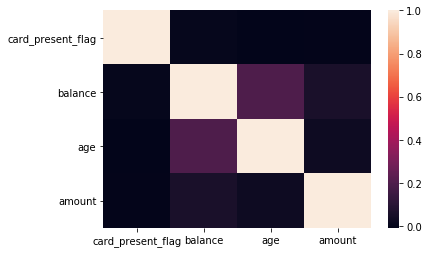

In [66]:
#correlation graph
sns.heatmap(df.corr())

In [67]:
#adding a new attribute- month of transaction
months = []
for date in df["date"]:
    if date.month == 8:
        months.append("August")
    elif date.month == 9:
        months.append("September")
    elif date.month == 10:
        months.append("October")
df["month"] = months

In [68]:
#adding a new attribute- hour of traansaction
hours = []
for hour1 in df["extraction"]:
    hours.append(hour1.hour)
df["hour"] = hours

In [69]:
#adding a new attribute- day of transaction
days = []
k=0
week_Aug = {1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun',6:'Mon',0:'Tue'}
week_Sep = {1:'Sat',2:'Sun',3:'Mon',4:'Tue',5:'Wed',6:'Thu',0:'Fri'}
week_Oct = {1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun',}
for i in df.loc[:,"extraction"]:
    date=df.loc[k,"extraction"]
    if date.month == 8:
        r=(date.day)%7
        days.append(week_Aug[r])
    if date.month==9:
        r=(date.day)%7
        days.append(week_Sep[r])
    if date.month==10:
        r=(date.day)%7
        days.append(week_Oct[r])
    k=k+1
df['Day']=days

In [70]:
df.head()

,status,card_present_flag,account,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,movement,month,hour,Day
0,authorized,1.0,ACC-1598451071,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01 01:01:15+00:00,16.25,CUS-2487424745,debit,August,1,Wed
1,authorized,0.0,ACC-1598451071,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01 01:13:45+00:00,14.19,CUS-2487424745,debit,August,1,Wed
2,authorized,1.0,ACC-1222300524,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01 01:26:15+00:00,6.42,CUS-2142601169,debit,August,1,Wed
3,authorized,1.0,ACC-1037050564,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01 01:38:45+00:00,40.90,CUS-1614226872,debit,August,1,Wed
4,authorized,1.0,ACC-1598451071,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01 01:51:15+00:00,3.25,CUS-2487424745,debit,August,1,Wed


In [71]:
#average transactions per month
for month in ['August','September','October']:
    month_data=df[df['month']==month]
    avg_transactions=len(month_data.index)/len(month_data['account'].unique())
    print("Average Transactions in",month,":",avg_transactions)

Average Transactions in August : 39.43
Average Transactions in September : 40.13
Average Transactions in October : 40.87


In [72]:
#average transactions per hour
def avg_trans(hr):
    day_data=df[df['hour']==hr]
    avg_transactions=len(day_data.index)/len(day_data['account'].unique())
    return avg_transactions
for i in range(24):
    print("Hour",i,":",int(np.round_(avg_trans(i))))

Hour 0 : 2
Hour 1 : 3
Hour 2 : 3
Hour 3 : 4
Hour 4 : 5
Hour 5 : 5
Hour 6 : 4
Hour 7 : 5
Hour 8 : 6
Hour 9 : 11
Hour 10 : 7
Hour 11 : 10
Hour 12 : 6
Hour 13 : 6
Hour 14 : 8
Hour 15 : 8
Hour 16 : 6
Hour 17 : 9
Hour 18 : 5
Hour 19 : 6
Hour 20 : 7
Hour 21 : 8
Hour 22 : 5
Hour 23 : 5


In [73]:
#average transactions per day of week
Week=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
for day in Week:
    week_data=df[df['Day']==day]
    avg_transactions=len(week_data.index)/len(week_data['account'].unique())
    print(day,":",int(np.round_(avg_transactions)))

Sun : 16
Mon : 14
Tue : 15
Wed : 21
Thu : 18
Fri : 21
Sat : 17


In [74]:
#Mean transaction amount per day of week
df.groupby('Day')['amount'].mean()

Day
Fri    249.353517
Mon    373.221000
Sat     54.419286
Sun     53.015845
Thu    184.010422
Tue    221.576456
Wed    195.215570
Name: amount, dtype: float64

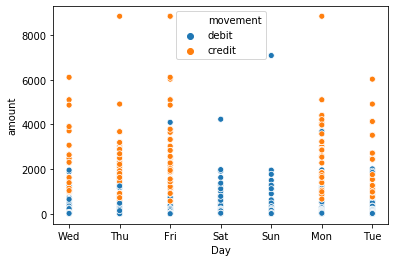

In [75]:
#transaction and movement per day of week
sns.scatterplot(x='Day',y='amount',hue='movement',data=df)

Text(0.5, 1.0, 'Frequency Distribution of Card Present/Not Present')

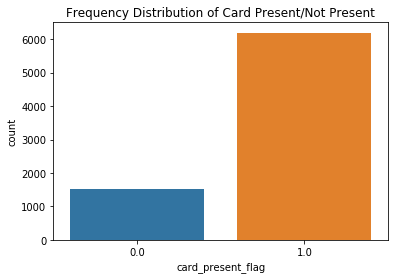

In [76]:
#count of card present/not present
sns.countplot(x = 'card_present_flag', data = df)
plt.title('Frequency Distribution of Card Present/Not Present')

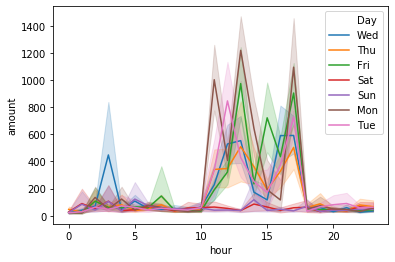

In [77]:
#transaction as function of day of week and hour
sns.lineplot(x='hour',y='amount',hue='Day',data=df)

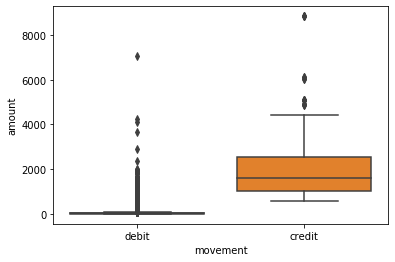

In [78]:
#movement vs transaction amount
sns.boxplot(x='movement', y='amount',data=df)

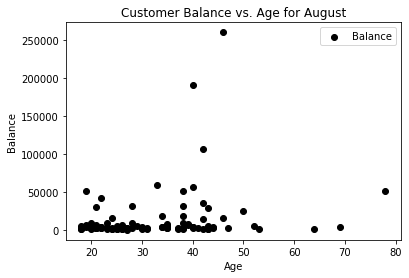

In [79]:
#Customer Balance vs. Age for August
temp = df[df["month"] == "August"].groupby("customer_id").mean()
plt.figure()
plt.scatter(temp["age"], temp["balance"], c="black", label="Balance")
plt.title("Customer Balance vs. Age for August")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.legend()

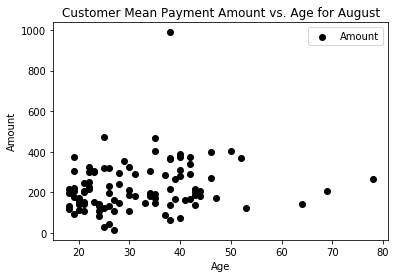

In [80]:
#Customer Mean Payment Amount vs. Age for August
plt.scatter(temp["age"], temp["amount"], c="black", label="Amount")
plt.title("Customer Mean Payment Amount vs. Age for August")
plt.xlabel("Age")
plt.ylabel("Amount")
plt.legend()

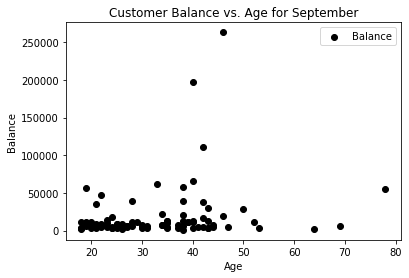

In [81]:
#Customer Balance vs. Age for September
temp = df[df["month"] == "September"].groupby("customer_id").mean()
plt.figure()
plt.scatter(temp["age"], temp["balance"], c="black", label="Balance")
plt.title("Customer Balance vs. Age for September")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.legend()

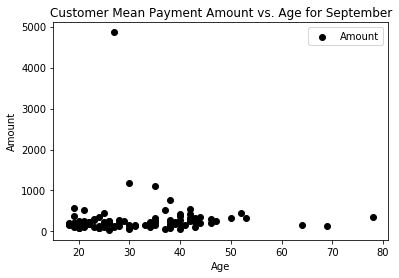

In [82]:
#Customer Mean Payment Amount vs. Age for September
plt.scatter(temp["age"], temp["amount"], c="black", label="Amount")
plt.title("Customer Mean Payment Amount vs. Age for September")
plt.xlabel("Age")
plt.ylabel("Amount")
plt.legend()

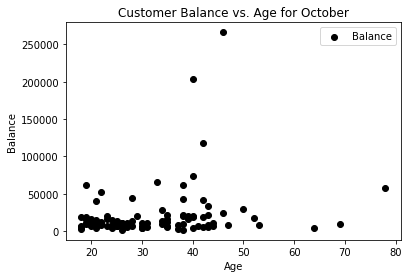

In [83]:
#Customer Balance vs. Age for October
temp = df[df["month"] == "October"].groupby("customer_id").mean()
plt.figure()
plt.scatter(temp["age"], temp["balance"], c="black", label="Balance")
plt.title("Customer Balance vs. Age for October")
plt.xlabel("Age")
plt.ylabel("Balance")
plt.legend()

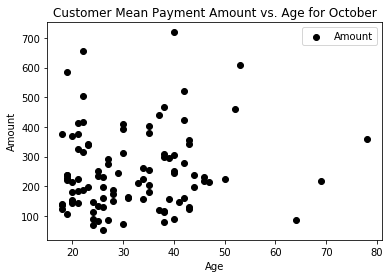

In [84]:
#Customer Mean Payment Amount vs. Age for October
plt.scatter(temp["age"], temp["amount"], c="black", label="Amount")
plt.title("Customer Mean Payment Amount vs. Age for October")
plt.xlabel("Age")
plt.ylabel("Amount")
plt.legend()

Text(0.5, 1.0, "Histogram of client's age")

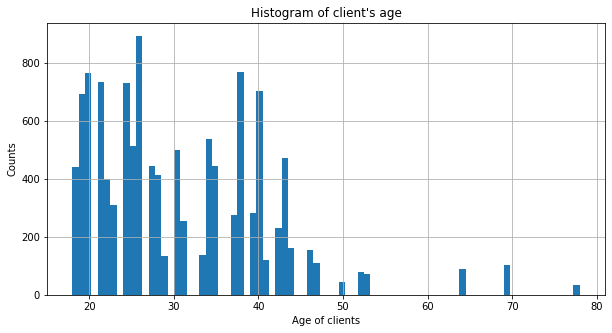

In [85]:
#Histogram of client's age
df["age"].hist(bins = 80, figsize=(10,5))
plt.xlabel("Age of clients")
plt.ylabel("Counts")
plt.title("Histogram of client's age")

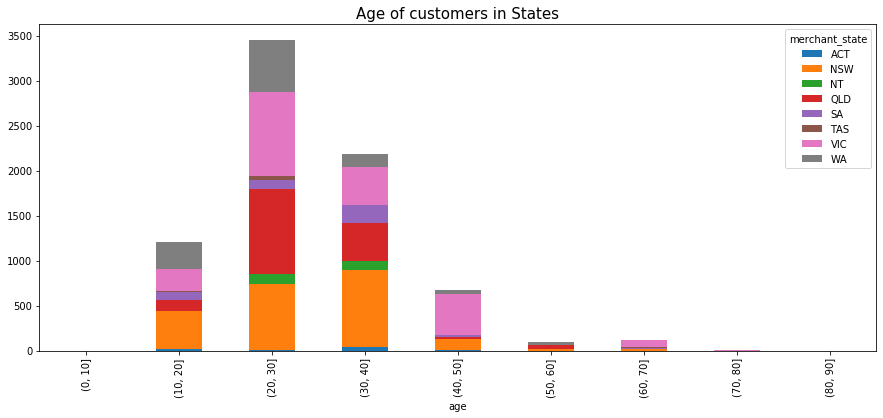

In [86]:
#Agewise customer population in States
f, ax = plt.subplots(nrows=1, figsize=(15,6))
df.groupby(['merchant_state',pd.cut(df['age'], np.arange(0,100,10))]).size().unstack(0).plot.bar(stacked=True, ax=ax)
ax.set_title('Age of customers in States',fontsize=15)
plt.show()